## Análisis para determinar cuál es el jugador mas importante de la NBA

Utilizaríamos el siguiente análisis como baseline, es un análisis similar que lo aplican a football.
[Referencia](https://towardsdatascience.com/who-is-the-premier-leagues-most-important-player-4f184f7b39e4)

La librería que recomienda el articulo de referencia para hacer gráficas para pagerank, es NetworkX. [Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

### Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Importamos la información

El dataset que utilizaremos esta este análisis lo obtuvimos de [kaggle](https://www.kaggle.com/schmadam97/nba-playbyplay-data-20182019/data) y tiene la siguiente estructura.
+ GameType - Regular or Playoff
+ Location - Stadium Name
+ Date - Date of Game
+ Time - Time of Game
+ WinningTeam - Team that Won the Game

Hay mas variables que su nombre las explica.

Por ahora solo importaremos la información de 2016 - 2017

In [6]:
filename = './../../Datos/NBA-PBP_2016-2017.csv'
#filename = 'Datos/NBA-PBP_2016-2017.csv'
data = pd.read_csv(filename)
pd.set_option('display.max_columns', 500)

## EDA

Veamos los primeros 5 registros para ver que forma tiene la información.

In [3]:
data.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,720,NYK,Jump ball: J. Noah vs. T. Thompson (D. Rose ga...,0,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,T. Thompson - CLE,D. Rose
1,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,700,NYK,D. Rose makes 2-pt layup from 1 ft (assist by ...,2,CLE,NaN,0,D. Rose - NYK,2-pt layup,make,1.0,J. Noah - NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,686,NYK,NaN,2,CLE,K. Love misses 2-pt hook shot from 4 ft,0,K. Love - CLE,2-pt hook shot,miss,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,683,NYK,Defensive rebound by J. Noah,2,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,676,NYK,C. Anthony misses 2-pt jump shot from 20 ft,2,CLE,NaN,0,C. Anthony - NYK,2-pt jump shot,miss,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora los últimos 5.

In [4]:
data.tail()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
596640,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,5,MIN,NaN,109,LAL,M. World Peace misses 3-pt jump shot from 23 ft,107,M. World Peace - LAL,3-pt jump shot,miss,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596641,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,3,MIN,NaN,109,LAL,Offensive rebound by J. Randle,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Randle - LAL,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596642,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,2,MIN,NaN,109,LAL,D. Russell makes 3-pt jump shot from 25 ft (as...,110,D. Russell - LAL,3-pt jump shot,make,25.0,J. Randle - LAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596643,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,0,MIN,End of 4th quarter,109,LAL,NaN,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596644,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,0,MIN,End of Game,109,LAL,NaN,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora veamos cuantas entradas tiene el dataset a total y para cada una de las columnas.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596645 entries, 0 to 596644
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   URL                 596645 non-null  object 
 1   GameType            596645 non-null  object 
 2   Location            596645 non-null  object 
 3   Date                596645 non-null  object 
 4   Time                596645 non-null  object 
 5   WinningTeam         596645 non-null  object 
 6   Quarter             596645 non-null  int64  
 7   SecLeft             596645 non-null  int64  
 8   AwayTeam            596645 non-null  object 
 9   AwayPlay            302493 non-null  object 
 10  AwayScore           596645 non-null  int64  
 11  HomeTeam            596645 non-null  object 
 12  HomePlay            294152 non-null  object 
 13  HomeScore           596645 non-null  int64  
 14  Shooter             223288 non-null  object 
 15  ShotType            223288 non-nul

Veamos la primera observación del dataset completa.

In [6]:
#data.columns.get_loc('Date')    --   Codigo util para obtener el indice de la columna dando el nombre
data.iloc[0]

URL                                        /boxscores/201610250CLE.html
GameType                                                        regular
Location                             Quicken Loans Arena Cleveland Ohio
Date                                                    October 25 2016
Time                                                            7:30 PM
WinningTeam                                                         CLE
Quarter                                                               1
SecLeft                                                             720
AwayTeam                                                            NYK
AwayPlay              Jump ball: J. Noah vs. T. Thompson (D. Rose ga...
AwayScore                                                             0
HomeTeam                                                            CLE
HomePlay                                                            NaN
HomeScore                                                       

Veamos alguna observación (jugada) en la que se obtuvieron puntos para ver como lo reporta el dataset. 

In [7]:
pd.unique(data['ShotOutcome'])

array([nan, 'make', 'miss'], dtype=object)

In [8]:
shotoutcome_make = data[data['ShotOutcome'] == 'make']
shotoutcome_make.iloc[0]

URL                                        /boxscores/201610250CLE.html
GameType                                                        regular
Location                             Quicken Loans Arena Cleveland Ohio
Date                                                    October 25 2016
Time                                                            7:30 PM
WinningTeam                                                         CLE
Quarter                                                               1
SecLeft                                                             700
AwayTeam                                                            NYK
AwayPlay              D. Rose makes 2-pt layup from 1 ft (assist by ...
AwayScore                                                             2
HomeTeam                                                            CLE
HomePlay                                                            NaN
HomeScore                                                       

In [9]:
shotoutcome_miss = data[data['ShotOutcome'] == 'miss']
shotoutcome_miss.iloc[1]

URL                                  /boxscores/201610250CLE.html
GameType                                                  regular
Location                       Quicken Loans Arena Cleveland Ohio
Date                                              October 25 2016
Time                                                      7:30 PM
WinningTeam                                                   CLE
Quarter                                                         1
SecLeft                                                       676
AwayTeam                                                      NYK
AwayPlay              C. Anthony misses 2-pt jump shot from 20 ft
AwayScore                                                       2
HomeTeam                                                      CLE
HomePlay                                                      NaN
HomeScore                                                       0
Shooter                                          C. Anthony - NYK
ShotType  

Veamos los valores únicos de las columnas.

In [10]:
pd.unique(data['Quarter'])

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [11]:
pd.unique(data['ShotType'])

array([nan, '2-pt layup', '2-pt hook shot', '2-pt jump shot',
       '3-pt jump shot', '2-pt dunk', '3-pt hook shot', '3-pt layup'],
      dtype=object)

In [12]:
pd.unique(data['Blocker'])

array([nan, 'K. Porziis - NYK', 'D. Rose - NYK', "K. O'Quinn - NYK",
       'C. Frye - CLE', 'I. Shumpert - CLE', 'C. Lee - NYK',
       'L. James - CLE', 'D. Liggins - CLE', 'C. Andersen - CLE',
       'R. Hood - UTA', 'G. Hill - UTA', 'E. Davis - POR',
       'J. Withey - UTA', 'R. Gobert - UTA', 'E. Turner - POR',
       'N. Vonleh - POR', 'K. Durant - GSW', 'D. Dedmon - SAS',
       'J. Simmons - SAS', 'D. West - GSW', 'D. Green - GSW',
       'I. Clark - GSW', 'P. McCaw - GSW', 'A. Bogut - DAL',
       'J. Anderson - DAL', 'M. Turner - IND', 'J. Barea - DAL',
       'D. Powell - DAL', 'S. Curry - DAL', 'A. Jefferson - IND',
       'D. Williams - DAL', 'D. Nowitzki - DAL', 'L. Allen - IND',
       'H. Whiteside - MIA', 'E. Payton - ORL', 'J. Winslow - MIA',
       'A. Gordon - ORL', 'S. Ibaka - ORL', 'W. Reed - MIA',
       'A. Horford - BOS', 'J. Crowder - BOS', 'J. Brown - BOS',
       'T. Zeller - BOS', 'J. Lin - BRK', 'J. Harris - BRK',
       'D. Gallinari - DEN', 'A. Davis - 

In [13]:
pd.unique(data['GameType'])

array(['regular', 'playoff'], dtype=object)

In [14]:
pd.unique(data['FoulType'])

array([nan, 'offensive', 'shooting', 'personal', 'def 3 sec tech',
       'loose ball', 'offensive charge', 'shooting block',
       'personal block', 'personal take', 'technical', 'flagrant',
       'inbound', 'clear path', 'away from play'], dtype=object)

In [15]:
pd.unique(data['ReboundType'])

array([nan, 'defensive', 'offensive'], dtype=object)

In [16]:
pd.unique(data['ViolationType'])

array([nan, 'kicked ball', 'jump ball', 'def goaltending', 'lane',
       'delay of game', 'double lane'], dtype=object)

*Analisis - play offs 2018 - Equipo cavaliers, determinar MVP*

*Buscar trabajos similares de referencia.*

## Feature engineering

### Datos para gráfica

Seleccionamos las columnas que nos interesan (`Shooter`y `Assister`), contando las apariciones de cada par:

In [17]:
df_sa = data.groupby(["Shooter","Assister", ]).size().reset_index().rename(columns={0:'count'})

Separamos en distintas columnas los nombres del shooter y el assister del equipo al que pertenecen:

In [18]:
df_sa[['shooter','sh_team']]= df_sa.Shooter.str.split(" - ",expand=True)
df_sa[['assister','as_team']]= df_sa.Assister.str.split(" - ",expand=True)

Y verificamos que las columnas de equipo resultantes sean iguales

In [19]:
comparacion = np.where(df_sa["sh_team"] == df_sa["as_team"], True, False)

In [20]:
comparacion

array([ True,  True,  True, ...,  True,  True,  True])

In [21]:
np.unique(comparacion)

array([ True])

Con lo que podemos conservar sólo una de ellas:

In [22]:
df_sa['team'] = df_sa['sh_team']

In [23]:
df_sa

,Shooter,Assister,count,shooter,sh_team,assister,as_team,team
0,. Abrines - OKC,A. Roberson - OKC,6,. Abrines,OKC,A. Roberson,OKC,OKC
1,. Abrines - OKC,C. Payne - OKC,3,. Abrines,OKC,C. Payne,OKC,OKC
2,. Abrines - OKC,D. McDermott - OKC,3,. Abrines,OKC,D. McDermott,OKC,OKC
3,. Abrines - OKC,D. Sabonis - OKC,8,. Abrines,OKC,D. Sabonis,OKC,OKC
4,. Abrines - OKC,E. Kanter - OKC,14,. Abrines,OKC,E. Kanter,OKC,OKC
...,...,...,...,...,...,...,...,...
5522,Z. Randolph - MEM,T. Douglas - MEM,7,Z. Randolph,MEM,T. Douglas,MEM,MEM
5523,Z. Randolph - MEM,T. Williams - MEM,1,Z. Randolph,MEM,T. Williams,MEM,MEM
5524,Z. Randolph - MEM,V. Carter - MEM,36,Z. Randolph,MEM,V. Carter,MEM,MEM
5525,Z. Randolph - MEM,W. Baldwin - MEM,6,Z. Randolph,MEM,W. Baldwin,MEM,MEM


Seleccionamos sólo las columnas a utilizar, esto es `shooter`, `assister`, `team` y `count`:

In [24]:
df_graph = df_sa[['shooter','assister','team','count']]
# df_graph.columns = [['shooter','assister','team','weight']]

In [25]:
df_graph

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,3
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
...,...,...,...,...
5522,Z. Randolph,T. Douglas,MEM,7
5523,Z. Randolph,T. Williams,MEM,1
5524,Z. Randolph,V. Carter,MEM,36
5525,Z. Randolph,W. Baldwin,MEM,6


Exploremos brevemente el data frame resultante.

In [26]:
df_graph.shape

(5527, 4)

Resumen estadístico

In [27]:
df_graph.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,5527.0,10.699837,18.247995,1.0,2.0,5.0,12.0,278.0


Tipo de datos:

In [28]:
df_graph.dtypes

shooter     object
assister    object
team        object
count        int64
dtype: object

Comprobamos que no tenemos NA:

In [29]:
x = df_graph.isnull().sum()
x

shooter     0
assister    0
team        0
count       0
dtype: int64

Número de observaciones únicas por variable:

In [30]:
df_graph.nunique()

shooter     457
assister    458
team         30
count       123
dtype: int64

In [31]:
df_graph['team'].unique()

array(['OKC', 'NOP', 'SAC', 'POR', 'LAC', 'DET', 'BRK', 'DAL', 'BOS',
       'IND', 'ORL', 'UTA', 'DEN', 'MEM', 'GSW', 'PHO', 'CHI', 'WAS',
       'MIN', 'PHI', 'HOU', 'TOR', 'SAS', 'LAL', 'NYK', 'CHO', 'CLE',
       'ATL', 'MIA', 'MIL'], dtype=object)

In [32]:
df_graph

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,3
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
...,...,...,...,...
5522,Z. Randolph,T. Douglas,MEM,7
5523,Z. Randolph,T. Williams,MEM,1
5524,Z. Randolph,V. Carter,MEM,36
5525,Z. Randolph,W. Baldwin,MEM,6


## Cleveland Cavaliers
Filtramos los datos para Cleveland Cavaliers, que es el equipo que nos interesa analizar:


In [33]:
df_CLE = df_graph[df_graph['team'] == 'CLE']

In [34]:
df_CLE

,shooter,assister,team,count
692,C. Andersen,D. Liggins,CLE,1
693,C. Andersen,K. Felder,CLE,2
694,C. Andersen,M. Dunleavy,CLE,1
695,C. Andersen,R. Jefferson,CLE,1
763,C. Frye,D. Liggins,CLE,4
...,...,...,...,...
5239,T. Thompson,K. Irving,CLE,102
5240,T. Thompson,K. Korver,CLE,6
5241,T. Thompson,K. Love,CLE,6
5242,T. Thompson,L. James,CLE,71


In [35]:
df_CLE.nunique()

shooter     18
assister    18
team         1
count       36
dtype: int64

In [36]:
shooters = df_CLE.shooter.unique()
shooters.sort()
shooters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [37]:
assisters = df_CLE.assister.unique()
assisters.sort()
assisters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [38]:
players = np.union1d(shooters,assisters)

In [39]:
len(players)

18

In [40]:
if len(shooters) == len(assisters):
    (shooters==assisters).all()

In [41]:
G = nx.Graph()
# G.clear()

In [42]:
G = nx.from_pandas_edgelist(df_CLE,source='assister',target='shooter',edge_attr='count',create_using=nx.DiGraph())
#nx.DiGraph()

Observemos que la gráfica tiene un nodo por cada jugador, y una arista para cada par de ellos que interactúan en una jugada de tiro:

In [43]:
G.number_of_nodes()

18

In [44]:
G.number_of_edges()

193

### Visualización

Text(0.5, 1.0, 'Número de interacciones entre shooters y assisters')

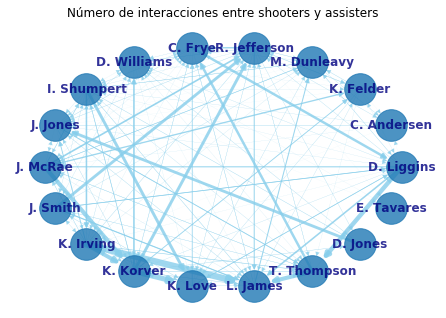

In [46]:
plt.clf() 
nx.draw_circular(G,node_size=1000,arrows=True,alpha = 0.8,
                 edge_color='skyblue', width=list(df_CLE['count']/25), edge_cmap=plt.cm.Blues, 
                 with_labels = True,font_size=12, font_color="navy", font_weight="bold")
plt.title("Número de interacciones entre shooters y assisters")

### Medidas de centralidad

In [53]:
degree = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen_cen = nx.eigenvector_centrality(G)
df_CLE_central = pd.DataFrame([degree,in_degree,out_degree,closeness,betweeness,eigen_cen]).transpose()
df_CLE_central.columns = ['degree','in_degree','out_degree','closeness','betweeness','eigen_cen']

In [54]:
df_CLE_central

,degree,in_degree,out_degree,closeness,betweeness,eigen_cen
D. Liggins,1.470588,0.588235,0.882353,0.708333,0.026851,0.209065
C. Andersen,0.529412,0.235294,0.294118,0.531250,0.000306,0.072292
K. Felder,1.117647,0.352941,0.764706,0.566667,0.007721,0.135569
M. Dunleavy,1.176471,0.588235,0.588235,0.653846,0.011765,0.210169
R. Jefferson,1.823529,0.882353,0.941176,0.894737,0.090200,0.300033
C. Frye,1.529412,0.823529,0.705882,0.850000,0.014478,0.294396
D. Williams,1.588235,0.823529,0.764706,0.809524,0.104184,0.273669
I. Shumpert,1.764706,0.823529,0.941176,0.850000,0.063187,0.278711
J. Jones,1.352941,0.823529,0.529412,0.850000,0.035617,0.273450
J. McRae,1.235294,0.705882,0.529412,0.739130,0.012535,0.242853


## Playoffs
Veamos ahora si las tendencias anteriores se mantienen si filtramos los datos de los Cleveland Cavaliers para playoffs. Filtramos entonces los datos iniciales, y repetimos el análisis:

In [42]:
df_playoffs = data[data['GameType'] == 'playoff']

In [43]:
df_playoffs

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
15962,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,720,SAS,Jump ball: L. Aldridge vs. M. Gasol (K. Leonar...,0,MEM,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Aldridge - SAS,M. Gasol - MEM,K. Leonard
15963,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,697,SAS,D. Green misses 2-pt jump shot from 13 ft,0,MEM,NaN,0,D. Green - SAS,2-pt jump shot,miss,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15964,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,695,SAS,Offensive rebound by D. Lee,0,MEM,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Lee - SAS,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15965,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,695,SAS,D. Lee makes 2-pt layup from 1 ft,2,MEM,NaN,0,D. Lee - SAS,2-pt layup,make,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15966,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,686,SAS,NaN,2,MEM,Personal foul by D. Green (drawn by V. Carter),0,NaN,NaN,NaN,NaN,NaN,NaN,personal,D. Green - SAS,V. Carter - MEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594392,/boxscores/201704150SAS.html,playoff,AT&T Center San Antonio Texas,April 15 2017,8:00 PM,SAS,4,8,MEM,W. Selden misses 3-pt jump shot from 25 ft,79,SAS,NaN,111,W. Selden - MEM,3-pt jump shot,miss,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594393,/boxscores/201704150SAS.html,playoff,AT&T Center San Antonio Texas,April 15 2017,8:00 PM,SAS,4,7,MEM,Offensive rebound by A. Harrison,79,SAS,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A. Harrison - MEM,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594394,/boxscores/201704150SAS.html,playoff,AT&T Center San Antonio Texas,April 15 2017,8:00 PM,SAS,4,1,MEM,A. Harrison makes 3-pt jump shot from 27 ft,82,SAS,NaN,111,A. Harrison - MEM,3-pt jump shot,make,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594395,/boxscores/201704150SAS.html,playoff,AT&T Center San Antonio Texas,April 15 2017,8:00 PM,SAS,4,0,MEM,End of 4th quarter,82,SAS,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seleccionamos las columnas que nos interesan (`Shooter`y `Assister`), contando las apariciones de cada par:

In [44]:
df_sa_playoff = df_playoffs.groupby(["Shooter","Assister", ]).size().reset_index().rename(columns={0:'count'})

Separamos en distintas columnas los nombres del shooter y el assister del equipo al que pertenecen:

In [45]:
df_sa_playoff[['shooter','sh_team']]= df_sa_playoff.Shooter.str.split(" - ",expand=True)
df_sa_playoff[['assister','as_team']]= df_sa_playoff.Assister.str.split(" - ",expand=True)

Y verificamos que las columnas de equipo resultantes sean iguales

In [46]:
comparacion_po = np.where(df_sa_playoff["sh_team"] == df_sa_playoff["as_team"], True, False)

In [48]:
np.unique(comparacion_po)

array([ True])

Con lo que podemos conservar sólo una de ellas:

In [49]:
df_sa_playoff['team'] = df_sa_playoff['sh_team']

In [50]:
df_sa_playoff

,Shooter,Assister,count,shooter,sh_team,assister,as_team,team
0,. Abrines - OKC,D. McDermott - OKC,1,. Abrines,OKC,D. McDermott,OKC,OKC
1,. Abrines - OKC,J. Grant - OKC,1,. Abrines,OKC,J. Grant,OKC,OKC
2,. Abrines - OKC,N. Cole - OKC,1,. Abrines,OKC,N. Cole,OKC,OKC
3,. Abrines - OKC,R. Westbrook - OKC,3,. Abrines,OKC,R. Westbrook,OKC,OKC
4,. Abrines - OKC,S. Adams - OKC,1,. Abrines,OKC,S. Adams,OKC,OKC
...,...,...,...,...,...,...,...,...
985,Z. Randolph - MEM,A. Harrison - MEM,2,Z. Randolph,MEM,A. Harrison,MEM,MEM
986,Z. Randolph - MEM,M. Conley - MEM,6,Z. Randolph,MEM,M. Conley,MEM,MEM
987,Z. Randolph - MEM,M. Gasol - MEM,4,Z. Randolph,MEM,M. Gasol,MEM,MEM
988,Z. Randolph - MEM,V. Carter - MEM,3,Z. Randolph,MEM,V. Carter,MEM,MEM


Seleccionamos sólo las columnas a utilizar, esto es `shooter`, `assister`, `team` y `count`:

In [51]:
df_graph_playoff = df_sa_playoff[['shooter','assister','team','count']]
# df_graph.columns = [['shooter','assister','team','weight']]

In [52]:
df_graph_playoff

,shooter,assister,team,count
0,. Abrines,D. McDermott,OKC,1
1,. Abrines,J. Grant,OKC,1
2,. Abrines,N. Cole,OKC,1
3,. Abrines,R. Westbrook,OKC,3
4,. Abrines,S. Adams,OKC,1
...,...,...,...,...
985,Z. Randolph,A. Harrison,MEM,2
986,Z. Randolph,M. Conley,MEM,6
987,Z. Randolph,M. Gasol,MEM,4
988,Z. Randolph,V. Carter,MEM,3


Exploremos brevemente el data frame resultante.

In [53]:
df_graph_playoff.shape

(990, 4)

Resumen estadístico

In [54]:
df_graph_playoff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,990.0,3.535354,4.433107,1.0,1.0,2.0,4.0,37.0


Tipo de datos:

In [55]:
df_graph_playoff.dtypes

shooter     object
assister    object
team        object
count        int64
dtype: object

Comprobamos que no tenemos NA:

In [56]:
x = df_graph_playoff.isnull().sum()
x

shooter     0
assister    0
team        0
count       0
dtype: int64

Número de observaciones únicas por variable:

In [57]:
df_graph_playoff.nunique()

shooter     189
assister    185
team         16
count        31
dtype: int64

In [58]:
df_graph_playoff['team'].unique()

array(['OKC', 'POR', 'BOS', 'MEM', 'GSW', 'CHI', 'LAC', 'WAS', 'HOU',
       'UTA', 'SAS', 'CLE', 'TOR', 'IND', 'ATL', 'MIL'], dtype=object)

In [59]:
df_graph_playoff

,shooter,assister,team,count
0,. Abrines,D. McDermott,OKC,1
1,. Abrines,J. Grant,OKC,1
2,. Abrines,N. Cole,OKC,1
3,. Abrines,R. Westbrook,OKC,3
4,. Abrines,S. Adams,OKC,1
...,...,...,...,...
985,Z. Randolph,A. Harrison,MEM,2
986,Z. Randolph,M. Conley,MEM,6
987,Z. Randolph,M. Gasol,MEM,4
988,Z. Randolph,V. Carter,MEM,3


## Cleveland Cavaliers - playoffs
Filtramos los datos para Cleveland Cavaliers, que es el equipo que nos interesa analizar:


In [60]:
df_CLE_playoff = df_graph_playoff[df_graph_playoff['team'] == 'CLE']

In [61]:
df_CLE_playoff

,shooter,assister,team,count
115,C. Frye,D. Williams,CLE,9
116,C. Frye,I. Shumpert,CLE,1
117,C. Frye,J. Smith,CLE,1
118,C. Frye,K. Irving,CLE,3
119,C. Frye,K. Korver,CLE,3
...,...,...,...,...
946,T. Thompson,J. Smith,CLE,2
947,T. Thompson,K. Irving,CLE,15
948,T. Thompson,K. Korver,CLE,2
949,T. Thompson,K. Love,CLE,1


In [62]:
df_CLE_playoff.nunique()

shooter     11
assister    11
team         1
count       19
dtype: int64

In [63]:
shooters = df_CLE_playoff.shooter.unique()
shooters.sort()
shooters

array(['C. Frye', 'D. Jones', 'D. Williams', 'I. Shumpert', 'J. Smith',
       'K. Irving', 'K. Korver', 'K. Love', 'L. James', 'R. Jefferson',
       'T. Thompson'], dtype=object)

In [64]:
assisters = df_CLE_playoff.assister.unique()
assisters.sort()
assisters

array(['C. Frye', 'D. Jones', 'D. Williams', 'I. Shumpert', 'J. Smith',
       'K. Irving', 'K. Korver', 'K. Love', 'L. James', 'R. Jefferson',
       'T. Thompson'], dtype=object)

In [65]:
players_playoff = np.union1d(shooters,assisters)

In [66]:
len(players_playoff)

11

In [67]:
if len(shooters) == len(assisters):
    (shooters==assisters).all()

In [68]:
G = nx.Graph()
# G.clear()

In [69]:
G = nx.from_pandas_edgelist(df_CLE_playoff,source='assister',target='shooter',edge_attr='count',create_using=nx.DiGraph())
#nx.DiGraph()

Observemos que la gráfica tiene un nodo por cada jugador, y una arista para cada par de ellos que interactúan en una jugada de tiro:

In [70]:
G.number_of_nodes()

11

In [71]:
G.number_of_edges()

68

### Visualización

Text(0.5, 1.0, 'Número de interacciones entre shooters y assisters')

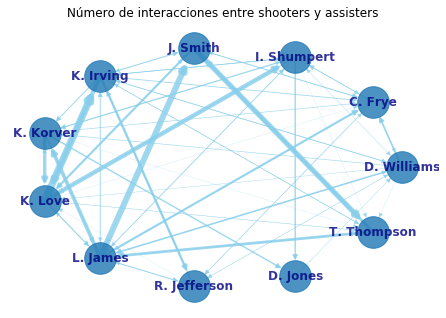

In [82]:
plt.clf() 
nx.draw_circular(G,node_size=1000,arrows=True,alpha = 0.8,
                 edge_color='skyblue', width=list(df_CLE_playoff['count']/5), edge_cmap=plt.cm.Blues, 
                 with_labels = True,font_size=12, font_color="navy", font_weight="bold")
plt.title("Número de interacciones entre shooters y assisters")

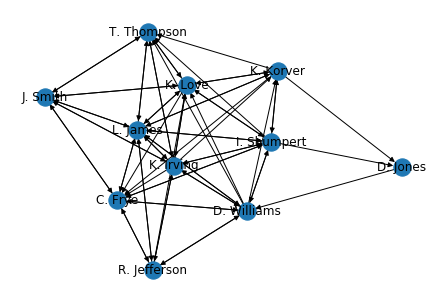

In [78]:
nx.draw_kamada_kawai(G,with_labels=True)

### Medidas de centralidad

In [80]:
degree = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen_cen = nx.eigenvector_centrality(G)
df_CLE_playoff_central = pd.DataFrame([degree,in_degree,out_degree,closeness,betweeness,eigen_cen]).transpose()
df_CLE_playoff_central.columns = ['degree','in_degree','out_degree','closeness','betweeness','eigen_cen']

In [81]:
df_CLE_playoff_central

,degree,in_degree,out_degree,closeness,betweeness,eigen_cen
D. Williams,1.6,0.7,0.9,0.714286,0.123951,0.296763
C. Frye,1.3,0.8,0.5,0.833333,0.045044,0.361630
I. Shumpert,1.4,0.6,0.8,0.714286,0.070670,0.299672
J. Smith,1.0,0.5,0.5,0.625000,0.010000,0.266843
K. Irving,1.6,0.7,0.9,0.769231,0.071014,0.324622
K. Korver,1.1,0.5,0.6,0.666667,0.037478,0.252503
K. Love,1.5,0.8,0.7,0.833333,0.048792,0.357557
L. James,1.8,0.9,0.9,0.909091,0.095829,0.404726
R. Jefferson,0.9,0.4,0.5,0.625000,0.004444,0.208163
D. Jones,0.3,0.2,0.1,0.476190,0.002778,0.082827


## Regular season
Veamos ahora si las tendencias anteriores se mantienen si filtramos los datos de los Cleveland Cavaliers para la temporada regular. Filtramos entonces los datos iniciales, y repetimos el análisis:

In [9]:
df_regular = data[data['GameType'] == 'regular']

In [10]:
df_regular

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,720,NYK,Jump ball: J. Noah vs. T. Thompson (D. Rose ga...,0,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,T. Thompson - CLE,D. Rose
1,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,700,NYK,D. Rose makes 2-pt layup from 1 ft (assist by ...,2,CLE,NaN,0,D. Rose - NYK,2-pt layup,make,1.0,J. Noah - NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,686,NYK,NaN,2,CLE,K. Love misses 2-pt hook shot from 4 ft,0,K. Love - CLE,2-pt hook shot,miss,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,683,NYK,Defensive rebound by J. Noah,2,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,676,NYK,C. Anthony misses 2-pt jump shot from 20 ft,2,CLE,NaN,0,C. Anthony - NYK,2-pt jump shot,miss,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596640,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,5,MIN,NaN,109,LAL,M. World Peace misses 3-pt jump shot from 23 ft,107,M. World Peace - LAL,3-pt jump shot,miss,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596641,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,3,MIN,NaN,109,LAL,Offensive rebound by J. Randle,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Randle - LAL,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596642,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,2,MIN,NaN,109,LAL,D. Russell makes 3-pt jump shot from 25 ft (as...,110,D. Russell - LAL,3-pt jump shot,make,25.0,J. Randle - LAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596643,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,0,MIN,End of 4th quarter,109,LAL,NaN,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seleccionamos las columnas que nos interesan (`Shooter`y `Assister`), contando las apariciones de cada par:

In [11]:
df_sa_regular = df_regular.groupby(["Shooter","Assister", ]).size().reset_index().rename(columns={0:'count'})

Separamos en distintas columnas los nombres del shooter y el assister del equipo al que pertenecen:

In [12]:
df_sa_regular[['shooter','sh_team']]= df_sa_regular.Shooter.str.split(" - ",expand=True)
df_sa_regular[['assister','as_team']]= df_sa_regular.Assister.str.split(" - ",expand=True)

Y verificamos que las columnas de equipo resultantes sean iguales

In [13]:
comparacion_po = np.where(df_sa_regular["sh_team"] == df_sa_regular["as_team"], True, False)

In [14]:
np.unique(comparacion_po)

array([ True])

Con lo que podemos conservar sólo una de ellas:

In [15]:
df_sa_regular['team'] = df_sa_regular['sh_team']

In [16]:
df_sa_regular

,Shooter,Assister,count,shooter,sh_team,assister,as_team,team
0,. Abrines - OKC,A. Roberson - OKC,6,. Abrines,OKC,A. Roberson,OKC,OKC
1,. Abrines - OKC,C. Payne - OKC,3,. Abrines,OKC,C. Payne,OKC,OKC
2,. Abrines - OKC,D. McDermott - OKC,2,. Abrines,OKC,D. McDermott,OKC,OKC
3,. Abrines - OKC,D. Sabonis - OKC,8,. Abrines,OKC,D. Sabonis,OKC,OKC
4,. Abrines - OKC,E. Kanter - OKC,14,. Abrines,OKC,E. Kanter,OKC,OKC
...,...,...,...,...,...,...,...,...
5472,Z. Randolph - MEM,T. Douglas - MEM,7,Z. Randolph,MEM,T. Douglas,MEM,MEM
5473,Z. Randolph - MEM,T. Williams - MEM,1,Z. Randolph,MEM,T. Williams,MEM,MEM
5474,Z. Randolph - MEM,V. Carter - MEM,33,Z. Randolph,MEM,V. Carter,MEM,MEM
5475,Z. Randolph - MEM,W. Baldwin - MEM,6,Z. Randolph,MEM,W. Baldwin,MEM,MEM


Seleccionamos sólo las columnas a utilizar, esto es `shooter`, `assister`, `team` y `count`:

In [17]:
df_graph_regular = df_sa_regular[['shooter','assister','team','count']]
# df_graph.columns = [['shooter','assister','team','weight']]

In [18]:
df_graph_regular

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,2
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
...,...,...,...,...
5472,Z. Randolph,T. Douglas,MEM,7
5473,Z. Randolph,T. Williams,MEM,1
5474,Z. Randolph,V. Carter,MEM,33
5475,Z. Randolph,W. Baldwin,MEM,6


Exploremos brevemente el data frame resultante.

In [19]:
df_graph_regular.shape

(5477, 4)

Resumen estadístico

In [20]:
df_graph_regular.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,5477.0,10.158481,16.93795,1.0,2.0,4.0,11.0,244.0


Tipo de datos:

In [21]:
df_graph_regular.dtypes

shooter     object
assister    object
team        object
count        int64
dtype: object

Comprobamos que no tenemos NA:

In [22]:
x = df_graph_regular.isnull().sum()
x

shooter     0
assister    0
team        0
count       0
dtype: int64

Número de observaciones únicas por variable:

In [23]:
df_graph_regular.nunique()

shooter     457
assister    458
team         30
count       118
dtype: int64

In [24]:
df_graph_regular['team'].unique()

array(['OKC', 'NOP', 'SAC', 'POR', 'LAC', 'DET', 'BRK', 'DAL', 'BOS',
       'IND', 'ORL', 'UTA', 'DEN', 'MEM', 'GSW', 'PHO', 'CHI', 'WAS',
       'MIN', 'PHI', 'HOU', 'TOR', 'SAS', 'LAL', 'NYK', 'CHO', 'CLE',
       'ATL', 'MIA', 'MIL'], dtype=object)

In [25]:
df_graph_regular

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,2
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
...,...,...,...,...
5472,Z. Randolph,T. Douglas,MEM,7
5473,Z. Randolph,T. Williams,MEM,1
5474,Z. Randolph,V. Carter,MEM,33
5475,Z. Randolph,W. Baldwin,MEM,6


## Cleveland Cavaliers - playoffs
Filtramos los datos para Cleveland Cavaliers, que es el equipo que nos interesa analizar:


In [26]:
df_CLE_regular = df_graph_regular[df_graph_regular['team'] == 'CLE']

In [27]:
df_CLE_regular

,shooter,assister,team,count
685,C. Andersen,D. Liggins,CLE,1
686,C. Andersen,K. Felder,CLE,2
687,C. Andersen,M. Dunleavy,CLE,1
688,C. Andersen,R. Jefferson,CLE,1
756,C. Frye,D. Liggins,CLE,4
...,...,...,...,...
5191,T. Thompson,K. Irving,CLE,87
5192,T. Thompson,K. Korver,CLE,4
5193,T. Thompson,K. Love,CLE,5
5194,T. Thompson,L. James,CLE,57


In [28]:
df_CLE_regular.nunique()

shooter     18
assister    18
team         1
count       34
dtype: int64

In [29]:
shooters = df_CLE_regular.shooter.unique()
shooters.sort()
shooters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [30]:
assisters = df_CLE_regular.assister.unique()
assisters.sort()
assisters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [31]:
players_regular = np.union1d(shooters,assisters)

In [32]:
len(players_regular)

18

In [33]:
if len(shooters) == len(assisters):
    (shooters==assisters).all()

In [34]:
G = nx.Graph()
# G.clear()

In [35]:
G = nx.from_pandas_edgelist(df_CLE_regular,source='assister',target='shooter',edge_attr='count',create_using=nx.DiGraph())
#nx.DiGraph()

Observemos que la gráfica tiene un nodo por cada jugador, y una arista para cada par de ellos que interactúan en una jugada de tiro:

In [36]:
G.number_of_nodes()

18

In [37]:
G.number_of_edges()

190

### Visualización

Text(0.5, 1.0, 'Número de interacciones entre shooters y assisters')

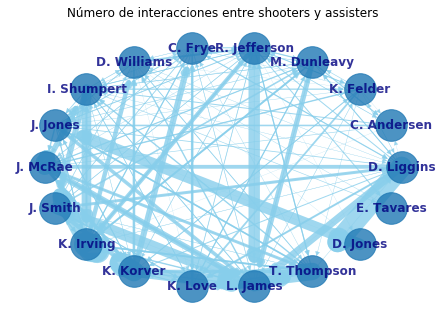

In [40]:
plt.clf() 
nx.draw_circular(G,node_size=1000,arrows=True,alpha = 0.8,
                 edge_color='skyblue', width=list(df_CLE_regular['count']/5), edge_cmap=plt.cm.Blues, 
                 with_labels = True,font_size=12, font_color="navy", font_weight="bold")
plt.title("Número de interacciones entre shooters y assisters")

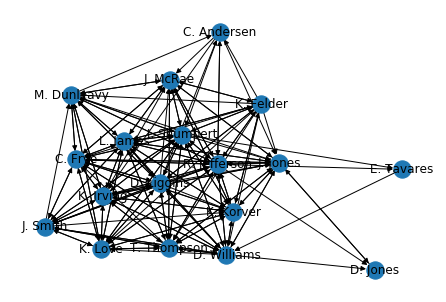

In [41]:
nx.draw_kamada_kawai(G,with_labels=True)

### Medidas de centralidad

In [44]:
degree = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen_cen = nx.eigenvector_centrality(G)
df_CLE_regular_central = pd.DataFrame([degree,in_degree,out_degree,closeness,betweeness,eigen_cen]).transpose()
df_CLE_regular_central.columns = ['degree','in_degree','out_degree','closeness','betweeness','eigen_cen']

In [45]:
df_CLE_regular_central

,degree,in_degree,out_degree,closeness,betweeness,eigen_cen
D. Liggins,1.470588,0.588235,0.882353,0.680000,0.024934,0.210714
C. Andersen,0.529412,0.235294,0.294118,0.531250,0.000306,0.073249
K. Felder,1.117647,0.352941,0.764706,0.566667,0.007721,0.137208
M. Dunleavy,1.176471,0.588235,0.588235,0.653846,0.011765,0.212712
R. Jefferson,1.823529,0.882353,0.941176,0.894737,0.105427,0.302485
C. Frye,1.529412,0.823529,0.705882,0.850000,0.016980,0.296755
D. Williams,1.529412,0.764706,0.764706,0.772727,0.077886,0.265509
I. Shumpert,1.705882,0.823529,0.882353,0.809524,0.051344,0.281222
J. Jones,1.352941,0.823529,0.529412,0.850000,0.081772,0.271819
J. McRae,1.235294,0.705882,0.529412,0.739130,0.013958,0.245473
